<a href="https://colab.research.google.com/github/junpito/collections-of-college-task/blob/main/Prak_damin_3_tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/praktikum/Mall_Customers.xls')
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.tail()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


#data analizing

dimensi data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Genre               200 non-null    int64
 1   Age                 200 non-null    int64
 2   Annual_Income_(k$)  200 non-null    int64
 3   Spending_Score      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [ ]:
df.shape

(200, 5)

periksa apa saja jenis data yang ada 


In [ ]:
df.dtypes

CustomerID             int64
Genre                 object
Age                    int64
Annual_Income_(k$)     int64
Spending_Score         int64
dtype: object

periksa apakah ada null

In [ ]:
df.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

data kita bersih dari null 

drop customer id karena tidak berguna 

In [ ]:
df.drop(['CustomerID'],axis=1, inplace=True)
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


dsekripsikan dataset

In [ ]:
df.describe()

,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


ubah genre menjadi nilai 0 dan 1

In [ ]:
df['Genre'].replace({'Female':1,'Male':0},inplace=True)
df.Genre.unique()

array([0, 1])

In [ ]:
df.dtypes

Genre                 int64
Age                   int64
Annual_Income_(k$)    int64
Spending_Score        int64
dtype: object

keliatannya data kita udah benar-benar clear. 

selanjutnya check korelasi antar data

In [ ]:
df.corr()

,Genre,Age,Annual_Income_(k$),Spending_Score
Genre,1.000000,-0.060867,-0.056410,0.058109
Age,-0.060867,1.000000,-0.012398,-0.327227
Annual_Income_(k$),-0.056410,-0.012398,1.000000,0.009903
Spending_Score,0.058109,-0.327227,0.009903,1.000000


In [ ]:
#Matriks Korelasi
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until


,Genre,Age,Annual_Income_(k$),Spending_Score
Genre,1.00,-0.06,-0.06,0.06
Age,-0.06,1.00,-0.01,-0.33
Annual_Income_(k$),-0.06,-0.01,1.00,0.01
Spending_Score,0.06,-0.33,0.01,1.00


menampilkan boxplot dari dataset

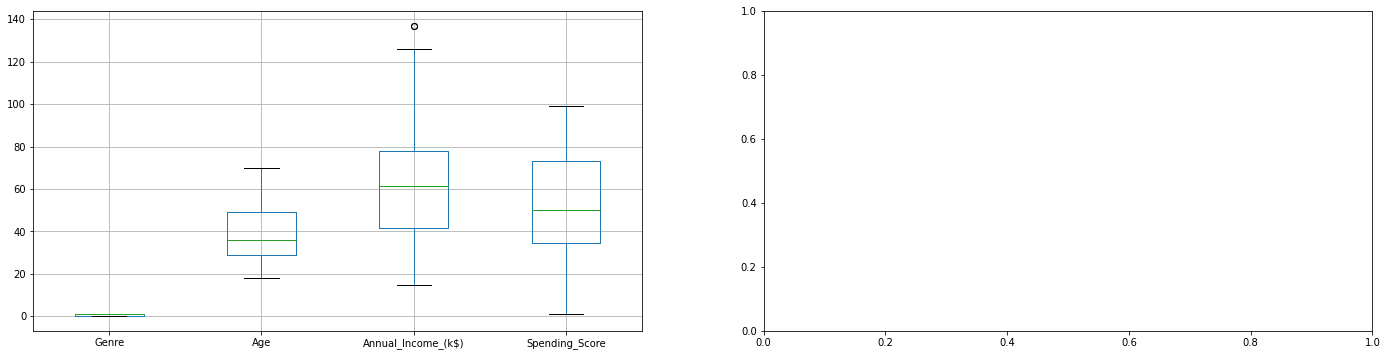

In [ ]:
 
plt.figure(figsize=(24,20))

plt.subplot(3, 2, 1)
fig = df.boxplot()
fig.set_title('')
fig.set_ylabel('')

plt.subplot(3, 2, 2) 

menapilkan barchart dan kurtoisisnya

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness:  0.3218425498619055
Kurtosis:  -0.09848708652696203


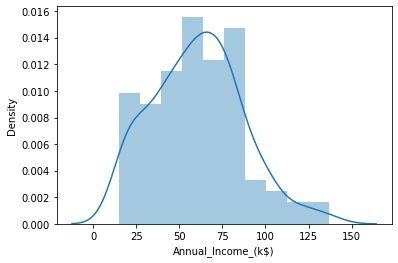

In [ ]:
sb.distplot(df['Annual_Income_(k$)'])
print("Skewness: ", df['Annual_Income_(k$)'].skew())
print("Kurtosis: ", df['Annual_Income_(k$)'].kurt())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness:  -0.047220201374263374
Kurtosis:  -0.8266291062061502


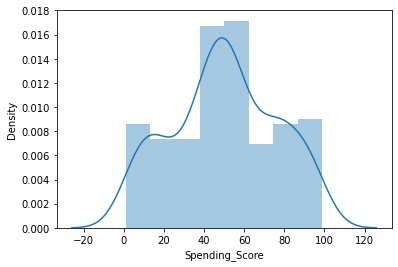

In [ ]:
sb.distplot(df['Spending_Score'])
print("Skewness: ", df['Spending_Score'].skew())
print("Kurtosis: ", df['Spending_Score'].kurt())

mencari angka optimum clustering. menggunaka elbow methode

In [ ]:
X = df.iloc[:, [2, 3]].values

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)



In [ ]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30259.65720728547,
 25011.839349156588,
 21850.165282585636,
 19672.072849014323]

visualisasikan

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


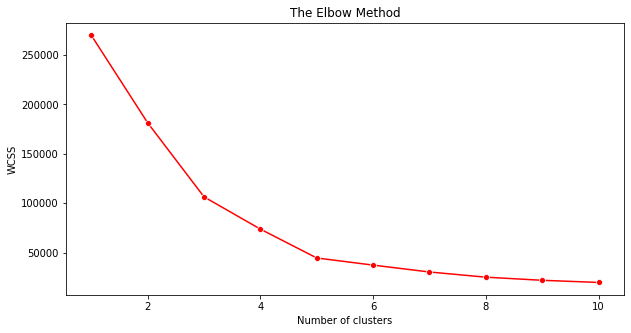

In [ ]:
plt.figure(figsize=(10,5))
sb.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

nilai terbaik wcss terbaik ada di 5 karena setelah itu tidak ada penurunan nilai yang signifikan

fitting KMeans ke dataset yang kita punya

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

visualisasikan

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

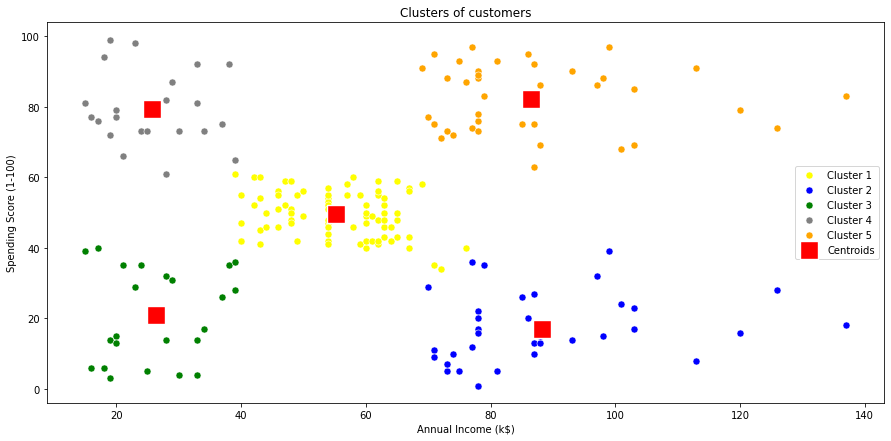

In [ ]:
plt.figure(figsize=(15,7))
sb.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sb.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sb.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sb.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sb.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sb.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()